# Pizza maker

Specify the topping to create the texture for your favorite pizza.

## How to use
Go through cells to:
* list the available toppings
* add missing topping (if needed)
* create your pizza texture

In [9]:
import os
assets_dir = os.path.abspath(".") 

## Prepare the topping

In [15]:
# List the ingredients
print("Available toppings:")
toppings_available = []
for f in os.listdir(assets_dir):
    # To be "available" an topping must have an associated PNG image in the `assets` folder
    if f.endswith(".png"):
        topping = f.split(".")[0]
        toppings_available.append(topping)
        print("\t* {}".format(topping.replace("_", " ")))

Available toppings:
	* cheese
	* french fries
	* margherita
	* wurstel


## Make your pizza

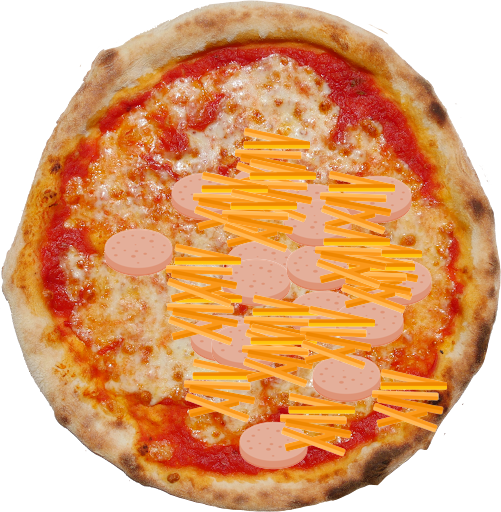

In [63]:
import math
import random
from PIL import Image

TOPPINGS_SELECTION = ["wurstel", "french_fries"]

# Import the 'base' pizza image
bg_img = Image.open(os.path.join(assets_dir,
                              "margherita.png")
                              )
bg_w, bg_h = bg_img.size

random.seed(1) # for reproducibility, change this to change your pizza!
# Scatter topping images onto the pizza image
R = min(bg_h // 2, bg_w // 2) * 0.5     # TODO. Add offset
r = min(bg_h // 2, bg_w // 2) * 0.25    # TODO. Add offset
d = 75 # size of topping image. TODO. Make it relative
for topping in TOPPINGS_SELECTION:
    if topping not in toppings_available:
        print("'{}' is not in the available toppings.\n".format(topping.capitalize()) + 
        "The topping will not be added to your pizza.\n" +
        "Please add the corresponding `{}.png` image in the `assets` dir to make it available.".format(topping))
        continue
    top_img = Image.open(os.path.join(assets_dir,
                                    "{}.png".format(topping)))
    top_img = top_img.resize((d, d))
    for i in range(-4, 4):
        ang = math.pi * i / 4
        offset = (bg_h // 2 + int(math.sin(ang) * R) + int((random.random()-0.5)*75), 
                  bg_w // 2 + int(math.cos(ang) * R) + int((random.random()-0.5)*75),
                  )
        bg_img.paste(top_img, offset, top_img)
        offset = (bg_h // 2 + int(math.sin(ang) * r) + int((random.random()-0.5)*75), 
                  bg_w // 2 + int(math.cos(ang) * r) + int((random.random()-0.5)*75),
                  )
        bg_img.paste(top_img, offset, top_img) 
# TODO. Display the result and save
bg_img

In [36]:
for i in range(-8, 8):
        ang = math.pi * i / 8
        print(math.sin(ang), math.cos(ang))

-1.2246467991473532e-16 -1.0
-0.3826834323650899 -0.9238795325112867
-0.7071067811865476 -0.7071067811865475
-0.9238795325112867 -0.3826834323650897
-1.0 6.123233995736766e-17
-0.9238795325112867 0.38268343236508984
-0.7071067811865476 0.7071067811865476
-0.3826834323650898 0.9238795325112867
0.0 1.0
0.3826834323650898 0.9238795325112867
0.7071067811865476 0.7071067811865476
0.9238795325112867 0.38268343236508984
1.0 6.123233995736766e-17
0.9238795325112867 -0.3826834323650897
0.7071067811865476 -0.7071067811865475
0.3826834323650899 -0.9238795325112867
